In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data=pd.read_csv("gujaratf.csv",low_memory=False)

In [6]:
data.describe()

,Mean,SD,Var,KUR,SKEW,Entr,Class
count,9.900000e+02,9.900000e+02,9.900000e+02,990.000000,990.000000,990.000000,990.000000
mean,3.301053e+04,4.185282e+06,3.400413e+14,249.748397,413.479864,45.124923,0.648485
std,2.615081e+05,3.200846e+07,4.279302e+15,93.557358,169.564285,21.727197,0.706515
min,5.713131e-02,8.951112e+00,4.006120e+01,56.917872,146.731560,3.583205,0.000000
25%,3.389027e+00,5.229229e+02,1.384827e+05,170.555956,243.382564,21.669666,0.000000
50%,2.919035e+01,4.459963e+03,1.405669e+07,256.146109,445.307349,55.360266,1.000000
75%,1.029551e+03,1.410842e+05,1.190718e+10,312.243231,501.119003,59.240462,1.000000
max,4.635434e+06,4.608146e+08,9.650000e+16,700.123181,1008.577053,97.910728,2.000000


In [7]:
Y=data.pop("Class")
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [27]:
X_2d = tsne.fit_transform(data)

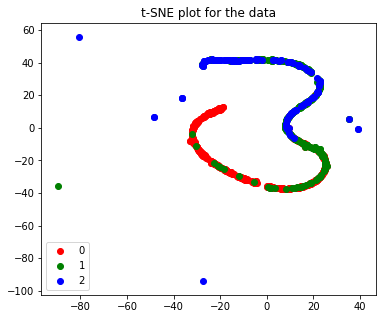

In [28]:
target_names=["0","1","2"]
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'silver', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[Y == i, 0], X_2d[Y == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.savefig('t-SNE.fig', format='eps', dpi=1000)
plt.savefig('t-SNE.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [13]:
import datetime
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from numpy import nan

now = datetime.datetime.now

Using TensorFlow backend.


In [14]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

In [16]:
from numpy import argmax
from keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(data, Y, random_state = 42)
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [17]:
print(X_train.shape[0])
print(X_test.shape[0])
dims = X_train.shape[1]
print(dims, 'dims')
print("Building model...")

742
248
6 dims
Building model...


In [29]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train

#print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
#print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

X_test_scaled = (X_test - min_train)/range_train

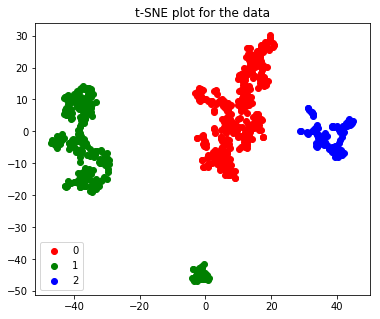

In [30]:
X_2d = tsne.fit_transform(X_train_scaled)
target_names=["0","1","2"]
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'silver', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[y_train == i, 0], X_2d[y_train == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.savefig('t-SNE_for_scaled.fig', format='eps', dpi=1000)
plt.savefig('t-SNE_for_scaled.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

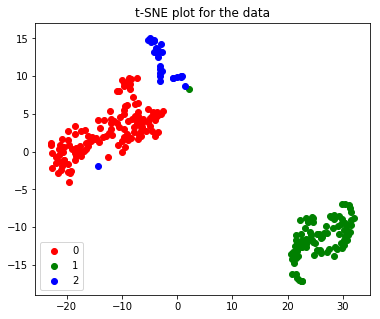

In [31]:
X_2d = tsne.fit_transform(X_test_scaled)
target_names=["0","1","2"]
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'silver', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[y_test == i, 0], X_2d[y_test == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.savefig('t-SNE_for_scaled_testdata.fig', format='eps', dpi=1000)
plt.savefig('t-SNE_for_scaled_testdata.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

In [22]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adam,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist1=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 742 samples, validate on 248 samples
Epoch 1/3000
742/742 [==============================] - 1s 745us/step - loss: 2.1576 - acc: 0.2884 - val_loss: 1.9616 - val_acc: 0.5282
Epoch 2/3000
742/742 [==============================] - 0s 77us/step - loss: 1.7987 - acc: 0.4784 - val_loss: 1.5381 - val_acc: 0.5282
Epoch 3/3000
742/742 [==============================] - 0s 77us/step - loss: 1.4047 - acc: 0.4784 - val_loss: 1.1744 - val_acc: 0.5242
Epoch 4/3000
742/742 [==============================] - 0s 71us/step - loss: 1.1253 - acc: 0.4811 - val_loss: 0.9715 - val_acc: 0.5484
Epoch 5/3000
742/742 [==============================] - 0s 73us/step - loss: 0.9526 - acc: 0.5741 - val_loss: 0.8492 - val_acc: 0.7258
Epoch 6/3000
742/742 [==============================] - 0s 127us/step - loss: 0.8247 - acc: 0.7844 - val_loss: 0.7391 - val_acc: 0.8750
Epoch 7/3000
742/742 [==============================] - 0s 128us/step - loss: 0.7024 - acc: 0.8679 - val_loss: 0.6268 - val_acc: 0.8831
Epoch 

742/742 [==============================] - 0s 73us/step - loss: 6.3008e-04 - acc: 1.0000 - val_loss: 0.0657 - val_acc: 0.9960
Epoch 120/3000
742/742 [==============================] - 0s 69us/step - loss: 6.1121e-04 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9960
Epoch 121/3000
742/742 [==============================] - 0s 71us/step - loss: 5.9888e-04 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9960
Epoch 122/3000
742/742 [==============================] - 0s 89us/step - loss: 5.8903e-04 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9960
Epoch 123/3000
742/742 [==============================] - 0s 88us/step - loss: 5.7222e-04 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9960
Epoch 124/3000
742/742 [==============================] - 0s 69us/step - loss: 5.6474e-04 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9960
Epoch 125/3000
742/742 [==============================] - 0s 71us/step - loss: 5.4931e-04 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9960
Epoch 126/3000
742/742 [====

Epoch 235/3000
742/742 [==============================] - 0s 104us/step - loss: 7.7187e-05 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9960
Epoch 236/3000
742/742 [==============================] - 0s 84us/step - loss: 7.6117e-05 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9960
Epoch 237/3000
742/742 [==============================] - 0s 128us/step - loss: 7.5040e-05 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9960
Epoch 238/3000
742/742 [==============================] - 0s 143us/step - loss: 7.3871e-05 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9960
Epoch 239/3000
742/742 [==============================] - 0s 129us/step - loss: 7.2626e-05 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9960
Epoch 240/3000
742/742 [==============================] - 0s 105us/step - loss: 7.1675e-05 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9960
Epoch 241/3000
742/742 [==============================] - 0s 135us/step - loss: 7.0741e-05 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9960
Epoch 2

Epoch 350/3000
742/742 [==============================] - 0s 109us/step - loss: 1.3965e-05 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 351/3000
742/742 [==============================] - 0s 93us/step - loss: 1.3749e-05 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 352/3000
742/742 [==============================] - 0s 90us/step - loss: 1.3551e-05 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 353/3000
742/742 [==============================] - 0s 74us/step - loss: 1.3333e-05 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 354/3000
742/742 [==============================] - 0s 58us/step - loss: 1.3160e-05 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 355/3000
742/742 [==============================] - 0s 67us/step - loss: 1.3283e-05 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 356/3000
742/742 [==============================] - 0s 62us/step - loss: 1.2708e-05 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 357/30

742/742 [==============================] - 0s 78us/step - loss: 6.1574e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 409/3000
742/742 [==============================] - 0s 82us/step - loss: 6.0392e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 410/3000
742/742 [==============================] - 0s 88us/step - loss: 5.9719e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 411/3000
742/742 [==============================] - 0s 136us/step - loss: 5.8538e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 412/3000
742/742 [==============================] - 0s 116us/step - loss: 5.8299e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 413/3000
742/742 [==============================] - 0s 141us/step - loss: 5.7044e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 414/3000
742/742 [==============================] - 0s 132us/step - loss: 5.6348e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 415/3000
742/742 [

742/742 [==============================] - 0s 100us/step - loss: 2.7873e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 467/3000
742/742 [==============================] - 0s 88us/step - loss: 2.7273e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 468/3000
742/742 [==============================] - 0s 131us/step - loss: 2.6891e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 469/3000
742/742 [==============================] - 0s 128us/step - loss: 2.6582e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 470/3000
742/742 [==============================] - 0s 110us/step - loss: 2.6660e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 471/3000
742/742 [==============================] - 0s 84us/step - loss: 2.5795e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 472/3000
742/742 [==============================] - 0s 70us/step - loss: 2.5833e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 473/3000
742/742 [

742/742 [==============================] - 0s 81us/step - loss: 6.0858e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 583/3000
742/742 [==============================] - 0s 94us/step - loss: 6.0401e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 584/3000
742/742 [==============================] - 0s 154us/step - loss: 5.9557e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 585/3000
742/742 [==============================] - 0s 146us/step - loss: 5.9171e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 586/3000
742/742 [==============================] - 0s 132us/step - loss: 5.8400e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 587/3000
742/742 [==============================] - 0s 137us/step - loss: 5.7420e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 588/3000
742/742 [==============================] - 0s 140us/step - loss: 5.6802e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 589/3000
742/742 

742/742 [==============================] - 0s 93us/step - loss: 3.2421e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 641/3000
742/742 [==============================] - 0s 85us/step - loss: 3.2020e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 642/3000
742/742 [==============================] - 0s 152us/step - loss: 3.1939e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 643/3000
742/742 [==============================] - 0s 151us/step - loss: 3.1907e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 644/3000
742/742 [==============================] - 0s 121us/step - loss: 3.0991e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 645/3000
742/742 [==============================] - 0s 123us/step - loss: 3.0919e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 646/3000
742/742 [==============================] - 0s 115us/step - loss: 3.0517e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 647/3000
742/742 

Epoch 698/3000
742/742 [==============================] - 0s 73us/step - loss: 2.0637e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 699/3000
742/742 [==============================] - 0s 65us/step - loss: 2.0476e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 700/3000
742/742 [==============================] - 0s 39us/step - loss: 2.0548e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 701/3000
742/742 [==============================] - 0s 67us/step - loss: 2.0436e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 702/3000
742/742 [==============================] - 0s 43us/step - loss: 2.0171e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 703/3000
742/742 [==============================] - 0s 42us/step - loss: 1.9994e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 704/3000
742/742 [==============================] - 0s 42us/step - loss: 1.9914e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 705/300

742/742 [==============================] - 0s 53us/step - loss: 1.5841e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 757/3000
742/742 [==============================] - 0s 67us/step - loss: 1.5753e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 758/3000
742/742 [==============================] - 0s 70us/step - loss: 1.5712e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 759/3000
742/742 [==============================] - 0s 62us/step - loss: 1.5696e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 760/3000
742/742 [==============================] - 0s 59us/step - loss: 1.5664e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 761/3000
742/742 [==============================] - 0s 61us/step - loss: 1.5560e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 762/3000
742/742 [==============================] - 0s 66us/step - loss: 1.5488e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 763/3000
742/742 [====

742/742 [==============================] - 0s 62us/step - loss: 1.2684e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 873/3000
742/742 [==============================] - 0s 62us/step - loss: 1.2692e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 874/3000
742/742 [==============================] - 0s 67us/step - loss: 1.2644e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 875/3000
742/742 [==============================] - 0s 66us/step - loss: 1.2644e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 876/3000
742/742 [==============================] - 0s 67us/step - loss: 1.2636e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 877/3000
742/742 [==============================] - 0s 65us/step - loss: 1.2612e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 878/3000
742/742 [==============================] - 0s 65us/step - loss: 1.2612e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 879/3000
742/742 [====

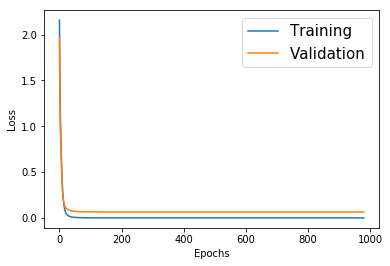

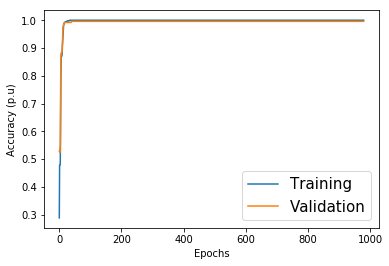

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
#plt.savefig('loss with adam.fig', format='eps', dpi=1000)
#plt.savefig('loss with adam.eps', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy (p.u)')
plt.plot(hist1.history['acc'])
plt.plot(hist1.history['val_acc'])
#plt.savefig('accuracy with adam.fig', format='eps', dpi=1000)
#plt.savefig('accuracy with adam.eps', format='eps', dpi=1000)
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})

In [33]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(29, input_shape=(dims,)))
m.add(Activation('softmax'))
m.add(Dense(20))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adam,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=1500, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 742 samples, validate on 248 samples
Epoch 1/1500
742/742 [==============================] - 1s 814us/step - loss: 2.2372 - acc: 0.4367 - val_loss: 2.1824 - val_acc: 0.5242
Epoch 2/1500
742/742 [==============================] - 0s 84us/step - loss: 2.1345 - acc: 0.4744 - val_loss: 2.0679 - val_acc: 0.5242
Epoch 3/1500
742/742 [==============================] - 0s 81us/step - loss: 2.0120 - acc: 0.4744 - val_loss: 1.9324 - val_acc: 0.5242
Epoch 4/1500
742/742 [==============================] - 0s 79us/step - loss: 1.8706 - acc: 0.4744 - val_loss: 1.7810 - val_acc: 0.5242
Epoch 5/1500
742/742 [==============================] - 0s 79us/step - loss: 1.7189 - acc: 0.4744 - val_loss: 1.6260 - val_acc: 0.5242
Epoch 6/1500
742/742 [==============================] - 0s 94us/step - loss: 1.5703 - acc: 0.4744 - val_loss: 1.4797 - val_acc: 0.5242
Epoch 7/1500
742/742 [==============================] - 0s 96us/step - loss: 1.4369 - acc: 0.4744 - val_loss: 1.3535 - val_acc: 0.5242
Epoch 8/

Epoch 61/1500
742/742 [==============================] - 0s 75us/step - loss: 0.1100 - acc: 0.9704 - val_loss: 0.1491 - val_acc: 0.9637
Epoch 62/1500
742/742 [==============================] - 0s 77us/step - loss: 0.1074 - acc: 0.9704 - val_loss: 0.1469 - val_acc: 0.9637
Epoch 63/1500
742/742 [==============================] - 0s 115us/step - loss: 0.1053 - acc: 0.9717 - val_loss: 0.1460 - val_acc: 0.9637
Epoch 64/1500
742/742 [==============================] - 0s 78us/step - loss: 0.1039 - acc: 0.9757 - val_loss: 0.1454 - val_acc: 0.9677
Epoch 65/1500
742/742 [==============================] - 0s 71us/step - loss: 0.1009 - acc: 0.9717 - val_loss: 0.1423 - val_acc: 0.9637
Epoch 66/1500
742/742 [==============================] - 0s 89us/step - loss: 0.0991 - acc: 0.9730 - val_loss: 0.1413 - val_acc: 0.9677
Epoch 67/1500
742/742 [==============================] - 0s 81us/step - loss: 0.0970 - acc: 0.9717 - val_loss: 0.1402 - val_acc: 0.9677
Epoch 68/1500
742/742 [========================

742/742 [==============================] - 0s 61us/step - loss: 0.0433 - acc: 0.9919 - val_loss: 0.1042 - val_acc: 0.9919
Epoch 122/1500
742/742 [==============================] - 0s 59us/step - loss: 0.0428 - acc: 0.9919 - val_loss: 0.1044 - val_acc: 0.9879
Epoch 123/1500
742/742 [==============================] - 0s 58us/step - loss: 0.0418 - acc: 0.9906 - val_loss: 0.1037 - val_acc: 0.9919
Epoch 124/1500
742/742 [==============================] - 0s 60us/step - loss: 0.0416 - acc: 0.9906 - val_loss: 0.1035 - val_acc: 0.9919
Epoch 125/1500
742/742 [==============================] - 0s 55us/step - loss: 0.0409 - acc: 0.9906 - val_loss: 0.1033 - val_acc: 0.9879
Epoch 126/1500
742/742 [==============================] - 0s 37us/step - loss: 0.0405 - acc: 0.9906 - val_loss: 0.1027 - val_acc: 0.9919
Epoch 127/1500
742/742 [==============================] - 0s 63us/step - loss: 0.0401 - acc: 0.9919 - val_loss: 0.1027 - val_acc: 0.9879
Epoch 128/1500
742/742 [==============================] 

Epoch 181/1500
742/742 [==============================] - 0s 77us/step - loss: 0.0173 - acc: 0.9960 - val_loss: 0.0900 - val_acc: 0.9919
Epoch 182/1500
742/742 [==============================] - 0s 78us/step - loss: 0.0169 - acc: 0.9960 - val_loss: 0.0897 - val_acc: 0.9919
Epoch 183/1500
742/742 [==============================] - 0s 81us/step - loss: 0.0164 - acc: 0.9973 - val_loss: 0.0893 - val_acc: 0.9919
Epoch 184/1500
742/742 [==============================] - 0s 115us/step - loss: 0.0162 - acc: 0.9973 - val_loss: 0.0889 - val_acc: 0.9919
Epoch 185/1500
742/742 [==============================] - 0s 98us/step - loss: 0.0158 - acc: 0.9973 - val_loss: 0.0884 - val_acc: 0.9919
Epoch 186/1500
742/742 [==============================] - 0s 74us/step - loss: 0.0154 - acc: 0.9973 - val_loss: 0.0880 - val_acc: 0.9919
Epoch 187/1500
742/742 [==============================] - 0s 82us/step - loss: 0.0150 - acc: 0.9973 - val_loss: 0.0877 - val_acc: 0.9919
Epoch 188/1500
742/742 [================

Epoch 241/1500
742/742 [==============================] - 0s 42us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0721 - val_acc: 0.9919
Epoch 242/1500
742/742 [==============================] - 0s 63us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0721 - val_acc: 0.9919
Epoch 243/1500
742/742 [==============================] - 0s 47us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0718 - val_acc: 0.9919
Epoch 244/1500
742/742 [==============================] - 0s 63us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.0719 - val_acc: 0.9919
Epoch 245/1500
742/742 [==============================] - 0s 42us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0717 - val_acc: 0.9919
Epoch 246/1500
742/742 [==============================] - 0s 71us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0714 - val_acc: 0.9919
Epoch 247/1500
742/742 [==============================] - 0s 56us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.0713 - val_acc: 0.9919
Epoch 248/1500
742/742 [=================

Epoch 301/1500
742/742 [==============================] - 0s 71us/step - loss: 9.8825e-04 - acc: 1.0000 - val_loss: 0.0670 - val_acc: 0.9960
Epoch 302/1500
742/742 [==============================] - 0s 77us/step - loss: 9.7297e-04 - acc: 1.0000 - val_loss: 0.0669 - val_acc: 0.9960
Epoch 303/1500
742/742 [==============================] - 0s 74us/step - loss: 9.4993e-04 - acc: 1.0000 - val_loss: 0.0669 - val_acc: 0.9960
Epoch 304/1500
742/742 [==============================] - 0s 71us/step - loss: 9.3756e-04 - acc: 1.0000 - val_loss: 0.0668 - val_acc: 0.9960
Epoch 305/1500
742/742 [==============================] - 0s 74us/step - loss: 9.1725e-04 - acc: 1.0000 - val_loss: 0.0668 - val_acc: 0.9960
Epoch 306/1500
742/742 [==============================] - 0s 74us/step - loss: 9.0370e-04 - acc: 1.0000 - val_loss: 0.0668 - val_acc: 0.9960
Epoch 307/1500
742/742 [==============================] - 0s 79us/step - loss: 8.8813e-04 - acc: 1.0000 - val_loss: 0.0667 - val_acc: 0.9960
Epoch 308/150

742/742 [==============================] - 0s 102us/step - loss: 3.7480e-04 - acc: 1.0000 - val_loss: 0.0657 - val_acc: 0.9960
Epoch 360/1500
742/742 [==============================] - 0s 105us/step - loss: 3.7151e-04 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9960
Epoch 361/1500
742/742 [==============================] - 0s 88us/step - loss: 3.6518e-04 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9960
Epoch 362/1500
742/742 [==============================] - 0s 104us/step - loss: 3.6827e-04 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9960
Epoch 363/1500
742/742 [==============================] - 0s 91us/step - loss: 3.6137e-04 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9960
Epoch 364/1500
742/742 [==============================] - 0s 77us/step - loss: 3.4471e-04 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9960
Epoch 365/1500
742/742 [==============================] - 0s 70us/step - loss: 3.3740e-04 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9960
Epoch 366/1500
742/742 [=

Epoch 417/1500
742/742 [==============================] - 0s 78us/step - loss: 1.5984e-04 - acc: 1.0000 - val_loss: 0.0652 - val_acc: 0.9960
Epoch 418/1500
742/742 [==============================] - 0s 78us/step - loss: 1.5732e-04 - acc: 1.0000 - val_loss: 0.0652 - val_acc: 0.9960
Epoch 419/1500
742/742 [==============================] - 0s 82us/step - loss: 1.5509e-04 - acc: 1.0000 - val_loss: 0.0652 - val_acc: 0.9960
Epoch 420/1500
742/742 [==============================] - 0s 78us/step - loss: 1.5304e-04 - acc: 1.0000 - val_loss: 0.0652 - val_acc: 0.9960
Epoch 421/1500
742/742 [==============================] - 0s 67us/step - loss: 1.5216e-04 - acc: 1.0000 - val_loss: 0.0652 - val_acc: 0.9960
Epoch 422/1500
742/742 [==============================] - 0s 73us/step - loss: 1.4968e-04 - acc: 1.0000 - val_loss: 0.0652 - val_acc: 0.9960
Epoch 423/1500
742/742 [==============================] - 0s 71us/step - loss: 1.5052e-04 - acc: 1.0000 - val_loss: 0.0652 - val_acc: 0.9960
Epoch 424/150

742/742 [==============================] - 0s 66us/step - loss: 3.5253e-05 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 533/1500
742/742 [==============================] - 0s 70us/step - loss: 3.4846e-05 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 534/1500
742/742 [==============================] - 0s 73us/step - loss: 3.4564e-05 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 535/1500
742/742 [==============================] - 0s 69us/step - loss: 3.3960e-05 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 536/1500
742/742 [==============================] - 0s 100us/step - loss: 3.3560e-05 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 537/1500
742/742 [==============================] - 0s 100us/step - loss: 3.3084e-05 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 538/1500
742/742 [==============================] - 0s 97us/step - loss: 3.2718e-05 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 539/1500
742/742 [==

Epoch 648/1500
742/742 [==============================] - 0s 42us/step - loss: 8.2235e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 649/1500
742/742 [==============================] - 0s 63us/step - loss: 8.0971e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 650/1500
742/742 [==============================] - 0s 42us/step - loss: 7.9768e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 651/1500
742/742 [==============================] - 0s 70us/step - loss: 7.8787e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 652/1500
742/742 [==============================] - 0s 58us/step - loss: 7.7910e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 653/1500
742/742 [==============================] - 0s 59us/step - loss: 7.6826e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 654/1500
742/742 [==============================] - 0s 58us/step - loss: 7.7017e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 655/150

742/742 [==============================] - 0s 73us/step - loss: 3.9499e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 707/1500
742/742 [==============================] - 0s 73us/step - loss: 3.9244e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 708/1500
742/742 [==============================] - 0s 66us/step - loss: 3.8561e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 709/1500
742/742 [==============================] - 0s 67us/step - loss: 3.8026e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 710/1500
742/742 [==============================] - 0s 66us/step - loss: 3.7864e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 711/1500
742/742 [==============================] - 0s 61us/step - loss: 3.7048e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 712/1500
742/742 [==============================] - 0s 42us/step - loss: 3.6802e-06 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 713/1500
742/742 [====

742/742 [==============================] - 0s 69us/step - loss: 9.5136e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 823/1500
742/742 [==============================] - 0s 73us/step - loss: 9.3634e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 824/1500
742/742 [==============================] - 0s 71us/step - loss: 9.2622e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 825/1500
742/742 [==============================] - 0s 69us/step - loss: 9.1754e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 826/1500
742/742 [==============================] - 0s 69us/step - loss: 9.0485e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 827/1500
742/742 [==============================] - 0s 67us/step - loss: 9.0276e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 828/1500
742/742 [==============================] - 0s 67us/step - loss: 8.7488e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 829/1500
742/742 [====

742/742 [==============================] - 0s 90us/step - loss: 2.9594e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 939/1500
742/742 [==============================] - 0s 86us/step - loss: 2.9031e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 940/1500
742/742 [==============================] - 0s 94us/step - loss: 2.9031e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 941/1500
742/742 [==============================] - 0s 78us/step - loss: 2.8373e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 942/1500
742/742 [==============================] - 0s 77us/step - loss: 2.8260e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 943/1500
742/742 [==============================] - 0s 74us/step - loss: 2.8260e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 944/1500
742/742 [==============================] - 0s 89us/step - loss: 2.8003e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 945/1500
742/742 [====

Epoch 1054/1500
742/742 [==============================] - 0s 67us/step - loss: 1.5889e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 1055/1500
742/742 [==============================] - 0s 73us/step - loss: 1.5986e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 1056/1500
742/742 [==============================] - 0s 63us/step - loss: 1.5713e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 1057/1500
742/742 [==============================] - 0s 69us/step - loss: 1.5696e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 1058/1500
742/742 [==============================] - 0s 67us/step - loss: 1.5664e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 1059/1500
742/742 [==============================] - 0s 69us/step - loss: 1.5632e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 1060/1500
742/742 [==============================] - 0s 70us/step - loss: 1.5600e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 

Epoch 1169/1500
742/742 [==============================] - 0s 77us/step - loss: 1.3142e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 1170/1500
742/742 [==============================] - 0s 90us/step - loss: 1.3070e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 1171/1500
742/742 [==============================] - 0s 81us/step - loss: 1.3021e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 1172/1500
742/742 [==============================] - 0s 74us/step - loss: 1.3046e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 1173/1500
742/742 [==============================] - 0s 81us/step - loss: 1.3021e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 1174/1500
742/742 [==============================] - 0s 92us/step - loss: 1.3021e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 1175/1500
742/742 [==============================] - 0s 92us/step - loss: 1.3021e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 

In [34]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist2=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 742 samples, validate on 248 samples
Epoch 1/3000
742/742 [==============================] - 1s 690us/step - loss: 1.8306 - acc: 0.4232 - val_loss: 1.2290 - val_acc: 0.5242
Epoch 2/3000
742/742 [==============================] - 0s 76us/step - loss: 1.0550 - acc: 0.6914 - val_loss: 0.7463 - val_acc: 0.8831
Epoch 3/3000
742/742 [==============================] - 0s 74us/step - loss: 0.6532 - acc: 0.8585 - val_loss: 0.5112 - val_acc: 0.8831
Epoch 4/3000
742/742 [==============================] - 0s 77us/step - loss: 0.4581 - acc: 0.8585 - val_loss: 0.3738 - val_acc: 0.8831
Epoch 5/3000
742/742 [==============================] - 0s 71us/step - loss: 0.3583 - acc: 0.8625 - val_loss: 0.3044 - val_acc: 0.9032
Epoch 6/3000
742/742 [==============================] - 0s 77us/step - loss: 0.2850 - acc: 0.8854 - val_loss: 0.2451 - val_acc: 0.9315
Epoch 7/3000
742/742 [==============================] - 0s 73us/step - loss: 0.2300 - acc: 0.9407 - val_loss: 0.1947 - val_acc: 0.9435
Epoch 8/

Epoch 61/3000
742/742 [==============================] - 0s 69us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 62/3000
742/742 [==============================] - 0s 67us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 1.0000
Epoch 63/3000
742/742 [==============================] - 0s 66us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000
Epoch 64/3000
742/742 [==============================] - 0s 63us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 65/3000
742/742 [==============================] - 0s 73us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 66/3000
742/742 [==============================] - 0s 67us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 1.0000
Epoch 67/3000
742/742 [==============================] - 0s 65us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 68/3000
742/742 [=========================

742/742 [==============================] - 0s 71us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 122/3000
742/742 [==============================] - 0s 67us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 123/3000
742/742 [==============================] - 0s 73us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 124/3000
742/742 [==============================] - 0s 66us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 125/3000
742/742 [==============================] - 0s 67us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 126/3000
742/742 [==============================] - 0s 66us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 127/3000
742/742 [==============================] - 0s 67us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 128/3000
742/742 [==============================] 

Epoch 180/3000
742/742 [==============================] - 0s 69us/step - loss: 7.4978e-04 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 181/3000
742/742 [==============================] - 0s 108us/step - loss: 7.4501e-04 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 182/3000
742/742 [==============================] - 0s 116us/step - loss: 7.3919e-04 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 183/3000
742/742 [==============================] - 0s 78us/step - loss: 7.3613e-04 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 184/3000
742/742 [==============================] - 0s 69us/step - loss: 7.3026e-04 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 0.9960
Epoch 185/3000
742/742 [==============================] - 0s 65us/step - loss: 7.2820e-04 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 0.9960
Epoch 186/3000
742/742 [==============================] - 0s 64us/step - loss: 7.2413e-04 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 0.9960
Epoch 187/3

Epoch 238/3000
742/742 [==============================] - 0s 72us/step - loss: 5.1960e-04 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 239/3000
742/742 [==============================] - 0s 50us/step - loss: 5.1653e-04 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 240/3000
742/742 [==============================] - 0s 42us/step - loss: 5.1610e-04 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 241/3000
742/742 [==============================] - 0s 63us/step - loss: 5.1079e-04 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 242/3000
742/742 [==============================] - 0s 42us/step - loss: 5.0873e-04 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 243/3000
742/742 [==============================] - 0s 66us/step - loss: 5.0611e-04 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 244/3000
742/742 [==============================] - 0s 42us/step - loss: 5.0310e-04 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 245/300

In [35]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=rmsp,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist3=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 742 samples, validate on 248 samples
Epoch 1/3000
742/742 [==============================] - 1s 763us/step - loss: 1.8370 - acc: 0.4744 - val_loss: 1.4657 - val_acc: 0.5282
Epoch 2/3000
742/742 [==============================] - 0s 98us/step - loss: 1.3816 - acc: 0.4744 - val_loss: 1.1557 - val_acc: 0.5282
Epoch 3/3000
742/742 [==============================] - 0s 78us/step - loss: 1.1427 - acc: 0.4879 - val_loss: 0.9883 - val_acc: 0.5444
Epoch 4/3000
742/742 [==============================] - 0s 73us/step - loss: 0.9850 - acc: 0.5458 - val_loss: 0.8740 - val_acc: 0.5605
Epoch 5/3000
742/742 [==============================] - 0s 74us/step - loss: 0.8783 - acc: 0.6631 - val_loss: 0.7975 - val_acc: 0.7097
Epoch 6/3000
742/742 [==============================] - 0s 73us/step - loss: 0.7888 - acc: 0.8086 - val_loss: 0.7112 - val_acc: 0.8185
Epoch 7/3000
742/742 [==============================] - 0s 74us/step - loss: 0.6988 - acc: 0.8544 - val_loss: 0.6332 - val_acc: 0.8629
Epoch 8/

742/742 [==============================] - 0s 71us/step - loss: 1.5439e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 119/3000
742/742 [==============================] - 0s 75us/step - loss: 1.5672e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 120/3000
742/742 [==============================] - 0s 78us/step - loss: 1.5431e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 121/3000
742/742 [==============================] - 0s 77us/step - loss: 1.5737e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 122/3000
742/742 [==============================] - 0s 79us/step - loss: 1.5094e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 123/3000
742/742 [==============================] - 0s 74us/step - loss: 1.4644e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 124/3000
742/742 [==============================] - 0s 79us/step - loss: 1.4395e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 125/3000
742/742 [====

742/742 [==============================] - 0s 74us/step - loss: 1.2122e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 177/3000
742/742 [==============================] - 0s 78us/step - loss: 1.2122e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 178/3000
742/742 [==============================] - 0s 78us/step - loss: 1.2130e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 179/3000
742/742 [==============================] - 0s 75us/step - loss: 1.2082e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 180/3000
742/742 [==============================] - 0s 78us/step - loss: 1.2090e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 181/3000
742/742 [==============================] - 0s 78us/step - loss: 1.2090e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 182/3000
742/742 [==============================] - 0s 66us/step - loss: 1.2082e-07 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9960
Epoch 183/3000
742/742 [====

In [36]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adagrad,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist4=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 742 samples, validate on 248 samples
Epoch 1/3000
742/742 [==============================] - 1s 996us/step - loss: 1.8216 - acc: 0.6644 - val_loss: 1.3782 - val_acc: 0.8790
Epoch 2/3000
742/742 [==============================] - 0s 79us/step - loss: 1.2808 - acc: 0.8329 - val_loss: 1.0501 - val_acc: 0.8790
Epoch 3/3000
742/742 [==============================] - 0s 75us/step - loss: 0.9998 - acc: 0.8598 - val_loss: 0.8219 - val_acc: 0.8790
Epoch 4/3000
742/742 [==============================] - 0s 81us/step - loss: 0.7876 - acc: 0.8612 - val_loss: 0.6496 - val_acc: 0.8831
Epoch 5/3000
742/742 [==============================] - 0s 77us/step - loss: 0.6106 - acc: 0.8625 - val_loss: 0.5268 - val_acc: 0.8831
Epoch 6/3000
742/742 [==============================] - 0s 79us/step - loss: 0.5034 - acc: 0.8639 - val_loss: 0.4530 - val_acc: 0.8831
Epoch 7/3000
742/742 [==============================] - 0s 80us/step - loss: 0.4338 - acc: 0.8652 - val_loss: 0.4091 - val_acc: 0.8831
Epoch 8/

Epoch 61/3000
742/742 [==============================] - 0s 79us/step - loss: 0.0379 - acc: 0.9933 - val_loss: 0.0732 - val_acc: 0.9919
Epoch 62/3000
742/742 [==============================] - 0s 97us/step - loss: 0.0371 - acc: 0.9933 - val_loss: 0.0744 - val_acc: 0.9919
Epoch 63/3000
742/742 [==============================] - 0s 112us/step - loss: 0.0365 - acc: 0.9933 - val_loss: 0.0728 - val_acc: 0.9919
Epoch 64/3000
742/742 [==============================] - 0s 96us/step - loss: 0.0358 - acc: 0.9933 - val_loss: 0.0722 - val_acc: 0.9919
Epoch 65/3000
742/742 [==============================] - 0s 77us/step - loss: 0.0347 - acc: 0.9933 - val_loss: 0.0715 - val_acc: 0.9919
Epoch 66/3000
742/742 [==============================] - 0s 77us/step - loss: 0.0340 - acc: 0.9933 - val_loss: 0.0717 - val_acc: 0.9919
Epoch 67/3000
742/742 [==============================] - 0s 77us/step - loss: 0.0331 - acc: 0.9933 - val_loss: 0.0710 - val_acc: 0.9919
Epoch 68/3000
742/742 [========================

742/742 [==============================] - 0s 77us/step - loss: 0.0129 - acc: 0.9973 - val_loss: 0.0679 - val_acc: 0.9919
Epoch 122/3000
742/742 [==============================] - 0s 73us/step - loss: 0.0128 - acc: 0.9973 - val_loss: 0.0679 - val_acc: 0.9919
Epoch 123/3000
742/742 [==============================] - 0s 77us/step - loss: 0.0126 - acc: 0.9973 - val_loss: 0.0680 - val_acc: 0.9919
Epoch 124/3000
742/742 [==============================] - 0s 73us/step - loss: 0.0125 - acc: 0.9973 - val_loss: 0.0681 - val_acc: 0.9919
Epoch 125/3000
742/742 [==============================] - 0s 71us/step - loss: 0.0123 - acc: 0.9973 - val_loss: 0.0683 - val_acc: 0.9919
Epoch 126/3000
742/742 [==============================] - 0s 65us/step - loss: 0.0121 - acc: 0.9973 - val_loss: 0.0695 - val_acc: 0.9919
Epoch 127/3000
742/742 [==============================] - 0s 67us/step - loss: 0.0121 - acc: 0.9973 - val_loss: 0.0687 - val_acc: 0.9919
Epoch 128/3000
742/742 [==============================] 

In [37]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adamax,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist5=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 742 samples, validate on 248 samples
Epoch 1/3000
742/742 [==============================] - 1s 1ms/step - loss: 1.8787 - acc: 0.4744 - val_loss: 1.5170 - val_acc: 0.5242
Epoch 2/3000
742/742 [==============================] - 0s 99us/step - loss: 1.3909 - acc: 0.4757 - val_loss: 1.1721 - val_acc: 0.5242
Epoch 3/3000
742/742 [==============================] - 0s 88us/step - loss: 1.1455 - acc: 0.4771 - val_loss: 1.0133 - val_acc: 0.5242
Epoch 4/3000
742/742 [==============================] - 0s 82us/step - loss: 1.0142 - acc: 0.4987 - val_loss: 0.9179 - val_acc: 0.5524
Epoch 5/3000
742/742 [==============================] - 0s 81us/step - loss: 0.9296 - acc: 0.5889 - val_loss: 0.8492 - val_acc: 0.7298
Epoch 6/3000
742/742 [==============================] - 0s 79us/step - loss: 0.8619 - acc: 0.8086 - val_loss: 0.7939 - val_acc: 0.8508
Epoch 7/3000
742/742 [==============================] - 0s 79us/step - loss: 0.8018 - acc: 0.8464 - val_loss: 0.7369 - val_acc: 0.8790
Epoch 8/30

742/742 [==============================] - 0s 73us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0111 - val_acc: 0.9960
Epoch 121/3000
742/742 [==============================] - 0s 78us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0109 - val_acc: 0.9960
Epoch 122/3000
742/742 [==============================] - 0s 131us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0112 - val_acc: 0.9960
Epoch 123/3000
742/742 [==============================] - 0s 166us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.0114 - val_acc: 0.9960
Epoch 00123: early stopping


In [38]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adad,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist6=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 742 samples, validate on 248 samples
Epoch 1/3000
742/742 [==============================] - 1s 1ms/step - loss: 2.0033 - acc: 0.4744 - val_loss: 1.6557 - val_acc: 0.5242
Epoch 2/3000
742/742 [==============================] - 0s 107us/step - loss: 1.3920 - acc: 0.4987 - val_loss: 1.0228 - val_acc: 0.5766
Epoch 3/3000
742/742 [==============================] - 0s 92us/step - loss: 0.8698 - acc: 0.8261 - val_loss: 0.6335 - val_acc: 0.8831
Epoch 4/3000
742/742 [==============================] - 0s 89us/step - loss: 0.5345 - acc: 0.8598 - val_loss: 0.4856 - val_acc: 0.9073
Epoch 5/3000
742/742 [==============================] - 0s 85us/step - loss: 0.3935 - acc: 0.8639 - val_loss: 0.3597 - val_acc: 0.9032
Epoch 6/3000
742/742 [==============================] - 0s 82us/step - loss: 0.3091 - acc: 0.8881 - val_loss: 0.2728 - val_acc: 0.8831
Epoch 7/3000
742/742 [==============================] - 0s 89us/step - loss: 0.2417 - acc: 0.9030 - val_loss: 0.2174 - val_acc: 0.8952
Epoch 8/3

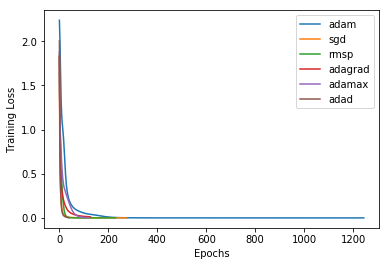

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.plot(hist.history['loss'])
plt.plot(hist2.history['loss'])
plt.plot(hist3.history['loss'])
plt.plot(hist4.history['loss'])
plt.plot(hist5.history['loss'])
plt.plot(hist6.history['loss'])
plt.savefig('loss with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('loss with diff. optimizers.eps', format='eps', dpi=1000)
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])

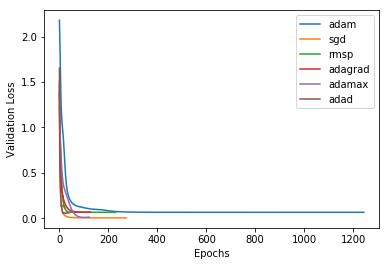

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
#plt.plot(hist1.history['loss'])
plt.plot(hist.history['val_loss'])
#plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
#plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
#plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
#plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
#plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('Validation loss with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('Validation loss with diff. optimizers.eps', format='eps', dpi=1000)

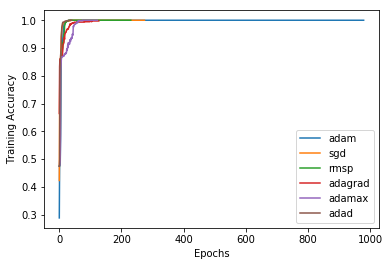

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.plot(hist1.history['acc'])
#plt.plot(hist1.history['val_loss'])
plt.plot(hist2.history['acc'])
#plt.plot(hist2.history['val_loss'])
plt.plot(hist3.history['acc'])
#plt.plot(hist3.history['val_loss'])
plt.plot(hist4.history['acc'])
#plt.plot(hist4.history['val_loss'])
plt.plot(hist5.history['acc'])
#plt.plot(hist5.history['val_loss'])
plt.plot(hist6.history['acc'])
#plt.plot(hist6.history['val_loss'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('training accuracy with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('training accuracy with diff. optimizers.eps', format='eps', dpi=1000)

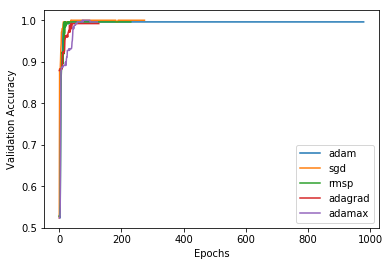

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.plot(hist1.history['val_acc'])
plt.plot(hist2.history['val_acc'])
plt.plot(hist3.history['val_acc'])
plt.plot(hist4.history['val_acc'])
plt.plot(hist5.history['val_acc'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('validation accuracy with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('validation accuracy with diff. optimizers.eps', format='eps', dpi=1000)